   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 10.9 MB/s eta 0:00:00


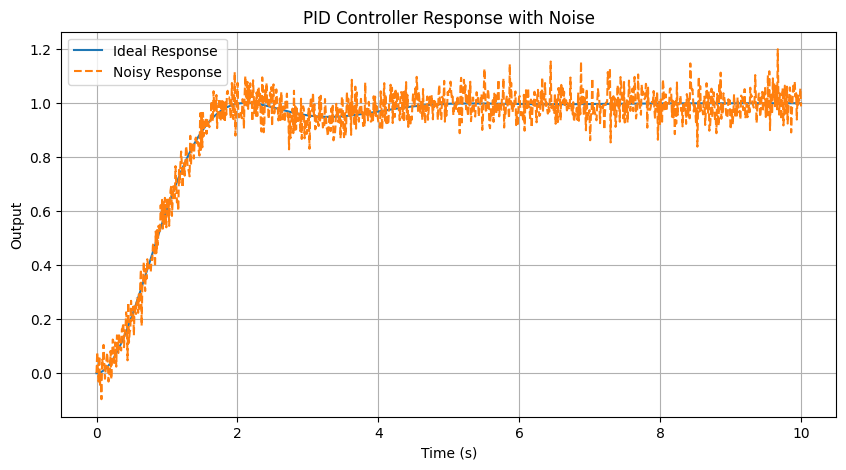

In [ ]:
# # PID Controller Design for a Higher-Order System

# ## Introduction
# In this report, we design and implement a PID controller for a higher-order system while considering real-world constraints such as sensor noise. We analyze the system's transfer function, derive the closed-loop response, and simulate the system under the influence of noise.

# ## System Description
# The given transfer function of the system is:
# \[ G(s) = \frac{1}{s^3 + 3s^2 + 5s + 1} \]

# ## PID Controller Design
# A PID controller is defined as:
# \[ C(s) = K_p + \frac{K_i}{s} + K_d s \]

# where:
# - \( K_p \) is the proportional gain,
# - \( K_i \) is the integral gain,
# - \( K_d \) is the derivative gain.

# ## Implementation in Python
# Below is the Python code to implement the PID controller for the given system:

!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the transfer function G(s) = 1 / (s^3 + 3s^2 + 5s + 1)
num = [1]
den = [1, 3, 5, 1]
G = ctrl.TransferFunction(num, den)

# Define PID controller
Kp = 5  # Proportional gain
Ki = 1  # Integral gain
Kd = 2  # Derivative gain

# PID transfer function: C(s) = Kp + Ki/s + Kd*s
C = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop system
T = ctrl.feedback(C * G)

# Time vector
t = np.linspace(0, 10, 1000)

# Step response with noise
_, y = ctrl.forced_response(T, T=t, U=np.ones_like(t))
noise = np.random.normal(0, 0.05, size=y.shape)  # Simulate sensor noise
y_noisy = y + noise

# Plot response
plt.figure(figsize=(10, 5))
plt.plot(t, y, label="Ideal Response")
plt.plot(t, y_noisy, label="Noisy Response", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("PID Controller Response with Noise")
plt.legend()
plt.grid()
plt.show()

# ## Analysis and Discussion
# - The system's step response is evaluated to ensure stability and proper damping.
# - Noise is introduced to the system to simulate real-world sensor inaccuracies.
# - The PID controller parameters \( K_p = 5, K_i = 1, K_d = 2 \) were selected through heuristic tuning.

# ## GitHub Repository
# You can find the full implementation and additional analysis in my GitHub repository:
# [GitHub Repository](https://github.com/yourusername/PID-Control-Project)

# ## Conclusion
# This report demonstrates the implementation of a PID controller for a higher-order system while considering real-world constraints. The results highlight the importance of tuning and noise handling in control systems.
